[![Py4Life](https://raw.githubusercontent.com/Py4Life/TAU2015/gh-pages/img/Py4Life-logo-small.png)](http://py4life.github.io/TAU2016/)

## Lecture 8 - 18.4.2016


# Previously

- BioPython
- Sequence analysis
- Sequence data in Python

# Today

#### Topics 

- Data analysis
- Summary statistics
- Data visualization

#### Packages

- [NumPy](http://www.numpy.org/) is the fundamental package for scientific computing with Python. It contains arrays, math functions, linear algebra, random number capabilities and much more.
- [Matplotlib](http://matplotlib.org/) is a plotting library which produces publication quality figures
- [Pandas](pandas.pydata.org) provides high-performance, easy-to-use data structures and data analysis tools.
- [Seaborn](http://stanford.edu/~mwaskom/software/seaborn/) is a visualization library based on _matplotlib_ that provides a high-level interface for plotting attractive statistical figures.

In [ ]:
!pip install Numpy
!pip install Matplotlib
!pip install Pandas
!pip install Seaborn

# Analyzing Patient Data

We are studying inflammation in patients who have been given a new treatment for arthritis, and need to analyze the first dozen data sets. The data sets are stored in comma-separated values (CSV) format: each row holds information for a single patient, and the columns represent successive days. The first few rows of our data file look like this:

> 0,0,1,3,1,2,4,7,8,3,3,3,10,5,7,4,7,7,12,18,6,13,11,11,7,7,4,6,8,8,4,4,5,7,3,4,2,3,0,0
0,1,2,1,2,1,3,2,2,6,10,11,5,9,4,4,7,16,8,6,18,4,12,5,12,7,11,5,11,3,3,5,4,4,5,5,1,1,0,1
0,1,1,3,3,2,6,2,5,9,5,7,4,5,4,15,5,11,9,10,19,14,12,17,7,12,11,7,4,2,10,5,4,2,2,3,2,2,1,1
0,0,2,0,4,2,2,1,6,7,10,7,9,13,8,8,15,10,10,7,17,4,4,7,6,15,6,4,9,11,3,5,6,3,3,4,2,3,2,1
0,1,1,3,3,1,3,5,2,4,4,7,6,5,3,10,8,10,6,17,9,14,9,7,13,9,12,6,7,7,9,6,3,2,2,4,2,0,1,1

#### Objectives

- Load __NumPy__, the basic scientific Python library 
- Read tabular data from a file into Python.
- Select individual values and subsections from data.
- Perform operations on arrays of data.
- Display simple plots

## Loading Data
While a lot of powerful tools are built into Python, even more tools exist in the libraries and packages that are written in Python.

In order to load our inflammation data, we need to import a library called __NumPy__.  We could load the data using the __csv__ module, but  you should use NumPy when you want to do things with numbers, especially if you have matrices or tables.

We can load _NumPy_ using import. We also load __urllib__ to read the data from the web:

In [2]:
import numpy as np
import urllib.request

First thing, we need to copy the file from the web to our local disk. This is done using the `urllib.request.urlretrieve` function:

In [3]:
url = r"https://raw.githubusercontent.com/swcarpentry/python-novice-inflammation/gh-pages/data/inflammation-01.csv"
fname = "inflammation-01.csv"
urllib.request.urlretrieve(url, fname)

('inflammation-01.csv', <http.client.HTTPMessage at 0x1ac7cd16080>)

We saved the file to the local filesystem. Go to the directory you're working from and take a look at the file.

Now we can ask _NumPy_ to read the data file:

In [58]:
data = np.loadtxt(fname, delimiter=',')
print(data)

[[ 0.  0.  1. ...,  3.  0.  0.]
 [ 0.  1.  2. ...,  1.  0.  1.]
 [ 0.  1.  1. ...,  2.  1.  1.]
 ..., 
 [ 0.  1.  1. ...,  1.  1.  1.]
 [ 0.  0.  0. ...,  0.  2.  0.]
 [ 0.  0.  1. ...,  1.  1.  0.]]


The expression `np.loadtxt(...)` is a function call that asks Python to run the function `loadtxt` that belongs to the `numpy` library. This dotted notation is used everywhere in Python to refer to the parts of things as `thing.component` (see: _namespaces_).

`numpy.loadtxt` has two parameters: the name of the file we want to read, and the delimiter that separates values on a line. These both need to be character strings (or strings for short), so we put them in quotes.

We saved the output of `loadtxt` in the variable `data`. When we `print(data)`, only a few rows and columns are shown (with `...` to omit elements when displaying big arrays). To save space, Python displays numbers as `1.` instead of `1.0` when there's nothing interesting after the decimal point.

## Manipulating Data

Now that our data is in memory, we can start doing things with it. First, let's ask what type of thing data refers to:

In [5]:
print(type(data))

<class 'numpy.ndarray'>


The output tells us that data currently refers to an N-dimensional array created by the NumPy library. 

To see its shape:

In [6]:
print(data.shape)
n_patients,n_days = data.shape

(60, 40)


This tells us that `data` has 60 rows and 40 columns, which are 60 patients and 40 days. `data.shape` is a member of `data`, i.e., a value that is stored as part of a larger value. We use the same dotted notation for the members of values that we use for the functions in libraries because they have the same part-and-whole relationship.

If we want to get a single value from the matrix, we must provide an index in square brackets, just as we do with a `list`, but with as many indices as the number of dimensions in `shape` (two in this case):

In [7]:
print("first value in data",data[0,0])
print("middle value in data:", data[30, 20])

first value in data 0.0
middle value in data: 13.0


The expression `data[30, 20]` may not surprise you, but `data[0, 0]` might. Programming languages like Fortran and MATLAB start counting at 1, because that's what human beings have done for thousands of years. Languages in the C family (including C++, Java, Perl, and Python) count from 0 because that's simpler for computers to do. Just like with `list` and `str`, if we have an M×N array in Python, its indices go from 0 to M-1 on the first axis and 0 to N-1 on the second. It takes a bit of getting used to, but one way to remember the rule is that the index is how many steps we have to take from the start to get the item we want.



An index like `[30, 20]` selects a single element of an array, but we can select whole sections as well. For example, we can select the first ten days (columns) of values for the first four (rows) patients like this:

In [8]:
print(data[0:4, 0:10])

[[ 0.  0.  1.  3.  1.  2.  4.  7.  8.  3.]
 [ 0.  1.  2.  1.  2.  1.  3.  2.  2.  6.]
 [ 0.  1.  1.  3.  3.  2.  6.  2.  5.  9.]
 [ 0.  0.  2.  0.  4.  2.  2.  1.  6.  7.]]


The slice `0:4` means, "Start at index 0 and go up to, but not including, index 4." Again, the up-to-but-not-including takes a bit of getting used to, but the rule is that the difference between the upper and lower bounds is the number of values in the slice.

We don't have to start slices at 0:

In [9]:
print(data[5:10, 0:10])

[[ 0.  0.  1.  2.  2.  4.  2.  1.  6.  4.]
 [ 0.  0.  2.  2.  4.  2.  2.  5.  5.  8.]
 [ 0.  0.  1.  2.  3.  1.  2.  3.  5.  3.]
 [ 0.  0.  0.  3.  1.  5.  6.  5.  5.  8.]
 [ 0.  1.  1.  2.  1.  3.  5.  3.  5.  8.]]


We also don't have to include the upper and lower bound on the slice. If we don't include the lower bound, Python uses 0 by default; if we don't include the upper, the slice runs to the end of the axis, and if we don't include either (i.e., if we just use ':' on its own), the slice includes everything:

In [10]:
small = data[:3, 36:]
print('small is:')
print(small)

small is:
[[ 2.  3.  0.  0.]
 [ 1.  1.  0.  1.]
 [ 2.  2.  1.  1.]]


Arrays also know how to perform common mathematical operations on their values. The simplest operations with data are arithmetic: add, subtract, multiply, and divide. When you do such operations on arrays, the operation is done on each individual element of the array. Thus:

In [11]:
doubledata = data * 2.0

will create a new array `doubledata` whose elements have the value of two times the value of the corresponding elements in `data`.

In [12]:
print('original:')
print(data[:3, 36:])
print('doubledata:')
print(doubledata[:3, 36:])

original:
[[ 2.  3.  0.  0.]
 [ 1.  1.  0.  1.]
 [ 2.  2.  1.  1.]]
doubledata:
[[ 4.  6.  0.  0.]
 [ 2.  2.  0.  2.]
 [ 4.  4.  2.  2.]]


If, instead of taking an array and doing arithmetic with a single value (as above) you did the arithmetic operation with another array of the same size and shape, the operation will be done on corresponding elements of the two arrays. Thus:

In [13]:
tripledata = doubledata + data

will give you an array where `tripledata[0,0]` will equal `doubledata[0,0]` plus `data[0,0]`, and so on for all other elements of the arrays.

In [14]:
print('tripledata:')
print(tripledata[:3, 36:])

tripledata:
[[ 6.  9.  0.  0.]
 [ 3.  3.  0.  3.]
 [ 6.  6.  3.  3.]]


## Exercise A - square root

Calculate the square root of the data using `numpy`. 
Print the result for the first 5 columns of the first 3 rows.

In [30]:
sqrtdata = data**0.5
sqrt2data = np.sqrt(data)
print(sqrt2data[:3, :5])

[[ 0.          0.          1.          1.73205081  1.        ]
 [ 0.          1.          1.41421356  1.          1.41421356]
 [ 0.          1.          1.          1.73205081  1.73205081]]


## Descriptive statistics

Often, we want to do more than add, subtract, multiply, and divide values of data. Arrays also know how to do more complex operations on their values. If we want to find the average inflammation for all patients on all days, for example, we can just ask the array for its mean value

In [15]:
print(data.mean())

6.14875


`mean` is a method of the array, i.e., a function that belongs to it in the same way that the member shape does. If variables are nouns, methods are verbs: they are what the thing in question knows how to do. This is why `data.shape` doesn't need to be called (it's just a thing) but `data.mean()` does (it's an action). It is also why we need empty parentheses for `ata.mean()`: even when we're not passing in any parameters, parentheses are how we tell Python to go and do something for us.

NumPy arrays have lots of useful methods:

In [16]:
print('maximum inflammation:', data.max())
print('minimum inflammation:', data.min())
print('standard deviation:', data.std())

maximum inflammation: 20.0
minimum inflammation: 0.0
standard deviation: 4.61383319712


When analyzing data, though, we often want to look at partial statistics, such as the maximum value per patient or the average value per day. One way to do this is to select the data we want to create a new temporary array, then ask it to do the calculation:

In [17]:
patient_0 = data[0, :] # 0 on the first axis, everything on the second
print('maximum inflammation for patient 0:', patient_0.max())

maximum inflammation for patient 0: 18.0


What if we need the maximum inflammation for all patients, or the average for each day? As the diagram below shows, we want to perform the operation across an axis:
![axis example](http://swcarpentry.github.io/python-novice-inflammation/fig/python-operations-across-axes.svg)
To support this, most array methods allow us to specify the axis we want to work on. If we ask for the average across axis 0, we get:

In [32]:
a = data.mean(axis=0)
print(type(a))

<class 'numpy.ndarray'>


As a quick check, we can ask this array what its shape is:

In [19]:
print(data.mean(axis=0).shape)

(40,)


The expression `(40,)` tells us we have an N×1 vector, so this is the average inflammation per day for all patients. If we average across axis 1, we get:

In [20]:
print(data.mean(axis=1))

[ 5.45   5.425  6.1    5.9    5.55   6.225  5.975  6.65   6.625  6.525
  6.775  5.8    6.225  5.75   5.225  6.3    6.55   5.7    5.85   6.55
  5.775  5.825  6.175  6.1    5.8    6.425  6.05   6.025  6.175  6.55
  6.175  6.35   6.725  6.125  7.075  5.725  5.925  6.15   6.075  5.75
  5.975  5.725  6.3    5.9    6.75   5.925  7.225  6.15   5.95   6.275  5.7
  6.1    6.825  5.975  6.725  5.7    6.25   6.4    7.05   5.9  ]


which is the average inflammation per patient across all days.

## Exercise B - sum

On which day did each patient had the most inflammation?
Use `data.argmax` to find out.

That means: we want to get a vector, so that in position _i_ we have the day in which patient _i_ (counting from 0) has the biggest measurement.

In [60]:
max_inflammation_day = data.argmax(axis=1)

## Plotting

The mathematician [Richard Hamming](http://en.wikipedia.org/wiki/Richard_Hamming) once said, **"The purpose of computing is insight, not numbers"**, and the best way to develop insight is often to visualize data. Visualization deserves an entire lecture (or course) of its own, but we can explore a few features of Python's `matplotlib` here. While there is no "official" plotting library, this package is the _de facto_ standard. First, let's tell the IPython Notebook that we want our plots displayed inline, rather than in a separate viewing window. This command will also import many other useful scientific python functions and modules, including NumPy:

In [21]:
%matplotlib?

In [22]:
%matplotlib inline
from matplotlib.pyplot import *

The `%` at the start of the line signals that this is a command for the _notebook_, rather than a statement in Python. 

Next, use two of `matplotlib`'s functions to create and display a heat map of our data:

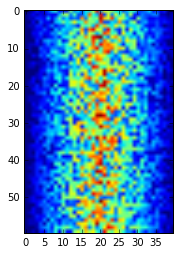

In [23]:
imshow(data);

Blue regions in this heat map are low values, while red shows high values. As we can see, inflammation rises and falls over a 40-day period (The `;` at the end of the line supresses the automatic printing of function's return value, which is an `AxesImage` in this case).

Let's take a look at the average inflammation over time:

(40,)


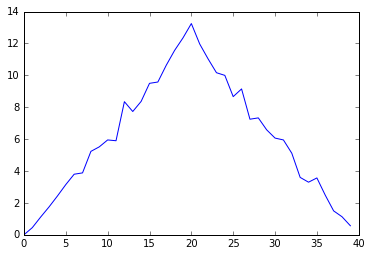

In [24]:
avg_inflammation = data.mean(axis=0)
print(avg_inflammation.shape)
plot(avg_inflammation);

Here, we put the average per day across all patients in the variable `avg_inflammation`, then used `plot` to create and display a line graph of those values. Let's have a look at two other statistics:

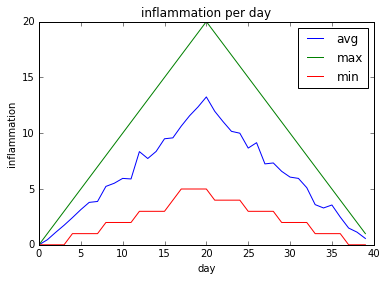

In [25]:
plot(avg_inflammation, label='avg')
plot(data.max(axis=0), label='max')
plot(data.min(axis=0), label='min')

# we can add some more features to the plot:
title('inflammation per day')
xlabel('day')
ylabel('inflammation')
legend();

`matplotlib` has many more plotting commands. For example, we can do a scatter plot to see the how the measurements correlate between two patients:

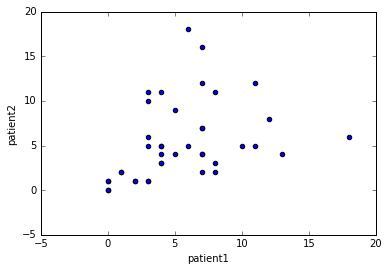

In [26]:
patient1 = data[0, :] #the first row of data
patient2 = data[1, :] #the second row of data
scatter(patient1, patient2)
xlabel("patient1")
ylabel("patient2")

Let's say we want to know the distribution of parients that reacted to the treatment at a given date.

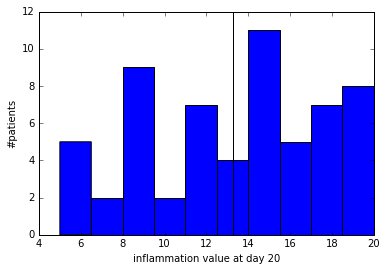

In [35]:
day_n = 20 #let's select the 21st day
patients_inflammation_for_day_n = data[:,day_n]
hist(patients_inflammation_for_day_n);
axvline(sum(patients_inflammation_for_day_n)/len(patients_inflammation_for_day_n), color='k');
xlabel("inflammation value at day " + str(day_n));
ylabel("#patients");

## Exercise C

In exercise B we calculated the day in which each patient had the most inflammation.
Let's plot it now - make a scatter plot using the `scatter` command, with patient number on x-axis and day of max inflammation on y-axis.
Don't forget to add axis labels with `xlabel` and `ylabel`!

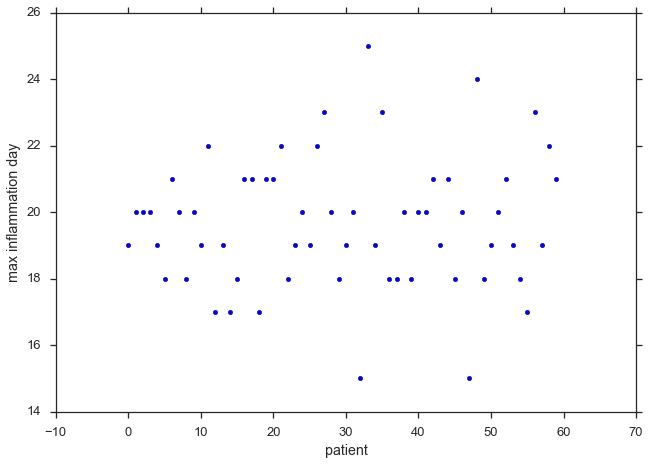

In [62]:
scatter(range(60), max_inflammation_day)
xlabel("patient")
ylabel("max inflammation day")

# Statistical Analysis of Life History Traits

Many times we want to display data with some smoothing or fitting of a regression line over it.
To do this, we will use the _pandas_ and _seaborn_ library.
_pandas_ is a very strong library for manipulation large datasets. _seaborn_ adds on top of _pandas_ a set of sophisticated statistical visualizations.


In [36]:
import zipfile
import pandas as pd
import seaborn as sns
sns.set_style("ticks") # control the plotting style
sns.set_context("talk") # set to talk because this is a lecture! hit shift-tab after the "(" to see other options.

We will analyze animal life-history data from [AnAge](http://genomics.senescence.info/download.html#anage). 
We will get the data from the download page, but it's compressed with zip so we need to unzip it and then we can read the data using _pandas_ `read_table` function:

In [37]:
urllib.request.urlretrieve('http://genomics.senescence.info/species/dataset.zip', 'anage_dataset.zip')

('anage_dataset.zip', <http.client.HTTPMessage at 0x1ac0113ddd8>)

In [38]:
with zipfile.ZipFile('anage_dataset.zip') as z:
    f = z.open('anage_data.txt')
    data = pd.read_table(f)
print(type(data))
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
(4212, 31)


_pandas_ holds data in `DataFrame` (similar to _R_).
`DataFrame` have a single row per observation (in contrast to the previous exercise in which each table cell was one observation), and each column has a single variable. Variables can be numbers or strings.

In [39]:
data.head()

,HAGRID,Kingdom,Phylum,Class,Order,Family,Genus,Species,Common name,Female maturity (days),...,Source,Specimen origin,Sample size,Data quality,IMR (per yr),MRDT (yrs),Metabolic rate (W),Body mass (g),Temperature (K),References
0,4,Animalia,Arthropoda,Insecta,Diptera,Drosophilidae,Drosophila,melanogaster,Fruit fly,7,...,NaN,captivity,large,acceptable,0.05,0.04,NaN,NaN,NaN,"2,20,32,47,53,68,69,240,241,242,243,274,602,98..."
1,5,Animalia,Arthropoda,Insecta,Hymenoptera,Apidae,Apis,mellifera,Honey bee,NaN,...,812,unknown,medium,acceptable,NaN,NaN,NaN,NaN,NaN,"63,407,408,741,805,806,808,812,815,828,830,831..."
2,7,Animalia,Arthropoda,Insecta,Hymenoptera,Formicidae,Lasius,niger,Black garden ant,NaN,...,411,unknown,medium,acceptable,NaN,NaN,NaN,NaN,NaN,"411,813,814"
3,8,Animalia,Arthropoda,Insecta,Lepidoptera,Nymphalidae,Bicyclus,anynana,Squinting bush brown,15,...,811,wild,medium,acceptable,NaN,NaN,NaN,NaN,NaN,"418,809,811"
4,9,Animalia,Arthropoda,Malacostraca,Decapoda,Nephropidae,Homarus,americanus,American lobster,NaN,...,2,wild,medium,acceptable,NaN,NaN,NaN,NaN,NaN,"2,13,594"


`DataFrame` has many of the features of `numpy.ndarray` - it also has a `shape` and various statistical methods (`max`, `mean` etc.).
However, `DataFrame` allows richer indexing.
For example, let's browse our data for species that have body mass greater than 300 kg.
First we will a new column that tells us if a row is a large animal row or not:

In [54]:
body_mass = data['Body mass (g)']
large_index = body_mass > 300*1000 # 300 kg
print(large_index)

832     False
840     False
850     False
874     False
881     False
899     False
902     False
904     False
906     False
925     False
931     False
933     False
937     False
952     False
963     False
966     False
989     False
990     False
1005    False
1010    False
1020    False
1035    False
1053    False
1064    False
1069    False
1070    False
1075    False
1076    False
1078    False
1131    False
        ...  
3629    False
3630    False
3631    False
3632    False
3635    False
3636    False
3638    False
3640    False
3643    False
3644    False
3645    False
3646    False
3650    False
3652    False
3653    False
3674    False
3698    False
3703    False
3789    False
3915    False
3924    False
3953    False
3955    False
3968    False
3974    False
3979    False
4125    False
4139    False
4148    False
4179    False
Name: Body mass (g), dtype: bool


The output shows for each row __True__ if the body mass is greater than 300kg and else __False__.

Now, we slice or data with this boolean index. 
The `iterrows` method let's us iterate over the rows of the data. Note that it will skip over the False rows, because we apply iterrows to large_index.

For each row we get both the row as a `Series` object (similar to `dict` for our use)
and the row number as an `int`.

In [41]:
large_data = data[large_index]
for tup in large_data.iterrows(): 
    print(tup[1]['Common name'], row['Body mass (g)']/1000, 'kg')

Domestic cattle 347.0 kg
Dromedary 407.0 kg
Moose 325.0 kg
Asian elephant 3672.0 kg
West Indian manatee 450.0 kg


So... a [Dromedary](http://en.wikipedia.org/wiki/Dromedary) is a Camel.

Let's continue with small and medium animals. For starters, let's plot a scatter of Body mass vs. Metabolic rate.
Because we work with _pandas_, we can do that with the `plot` method of `DataFrame`, specifying the columns for `x` and `y` and a plotting style (without the style we would get a line plot which makes no sense here).

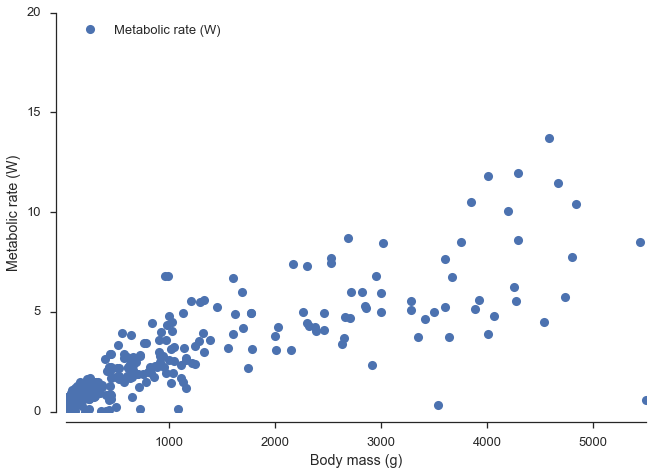

In [56]:
data = data[data['Body mass (g)'] < 3e5] 
data.plot(x='Body mass (g)', y='Metabolic rate (W)', style='o')
ylabel('Metabolic rate (W)')
sns.despine(offset=10)
ylim(0, 20);

`sns.despine` removes the upper and right axes and the additional `offset` keyword creates a space between the plot and the axis.

From this plot it seems that 1) there is a correlation between body mass and metabolic rate, and 2) there are many small animals (less than 30 kg) and not many medium animals (between 50 and 300 kg).

Before we continue, I prefer to have mass in kg, let's add a new column:

In [43]:
data['Body mass (kg)'] = data['Body mass (g)']/1000

Next, let's check how many records we have for each Class (as in the taxonomic unit): 

In [44]:
class_counts = data.Class.value_counts()
print(class_counts)

Mammalia    417
Aves        171
Amphibia     18
Reptilia     16
Name: Class, dtype: int64


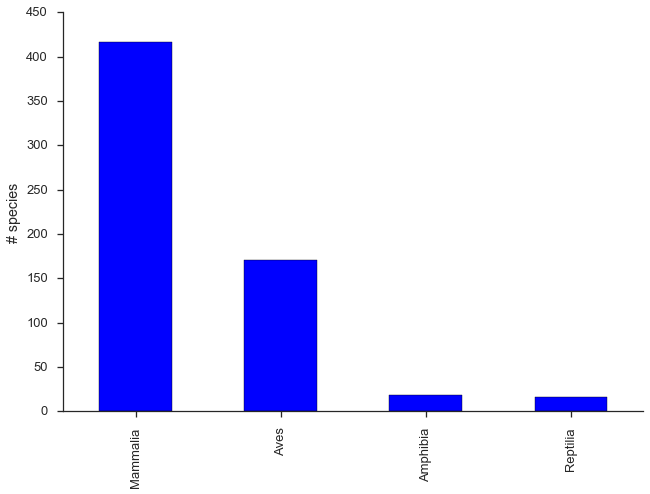

In [45]:
class_counts.plot(kind='bar')
ylabel('# species')
sns.despine()

So we have lots of mammals and birds, and a few reptiles and amphibians. This is important as amphibian and reptiles could have a different replationship between mass and metabolism.

Let's do a simple linear regression plot; but let's do it in separate for each Class. This is done using _seaborn_'s `lmplot` function:

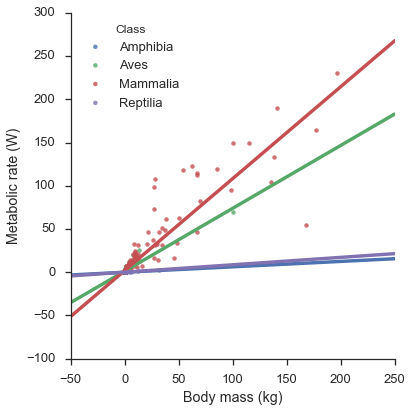

In [46]:
sns.lmplot(x='Body mass (kg)', y='Metabolic rate (W)', data=data, hue='Class', ci=False, size=6, legend_out=False);

Note that `hue` means _color_, but it also causes _seaborn_ to fit a different linear model to each of the Classes. 
As for the last 3 paramteres:
- `ci` controls the confidence intervals. I chose `False`, but setting it to `True` will show them.
- `size` controls the size of the plot
- `legend_out` decides if the legend is inside the plot or outside. We have enough space for it in the left corner.

We can see that mammals and birds have a clear correlation between size and metabolism and that it extends over a nice range of mass, so let's stick to mammals; next up we will see which Orders of mammals we have.

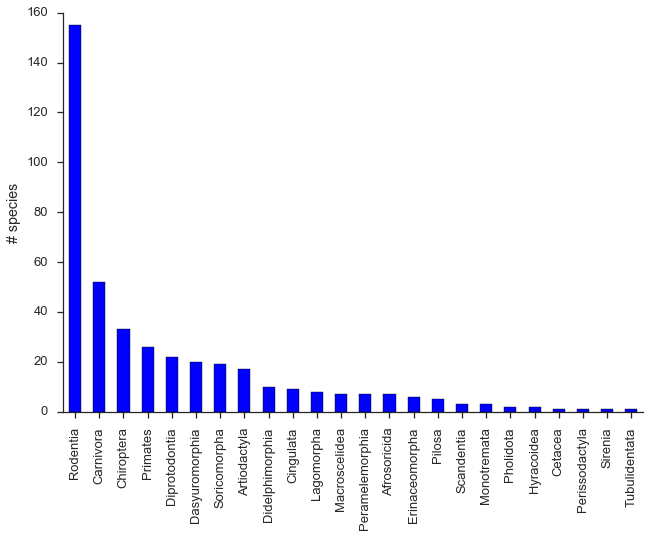

In [47]:
mammalia = data[data.Class=='Mammalia']
order_counts = mammalia.Order.value_counts()
ax=order_counts.plot(kind='bar')
ylabel('# species')
sns.despine();

You see we have alot of rodents and carnivores, but also a good number of bats (_Chiroptera_) and primates.

Let's continue only with orders that have at least 20 species - this also includes some cool marsupials like Kangaroo, Koala and [Taz](http://upload.wikimedia.org/wikipedia/en/c/c4/Taz-Looney_Tunes.svg) (Diprotodontia and Dasyuromorphia)

In [48]:
orders = order_counts[order_counts >= 20]
print(orders)
abund_mammalia = mammalia[mammalia.Order.isin(orders.index)]

Rodentia          155
Carnivora          52
Chiroptera         33
Primates           26
Diprotodontia      22
Dasyuromorphia     20
Name: Order, dtype: int64


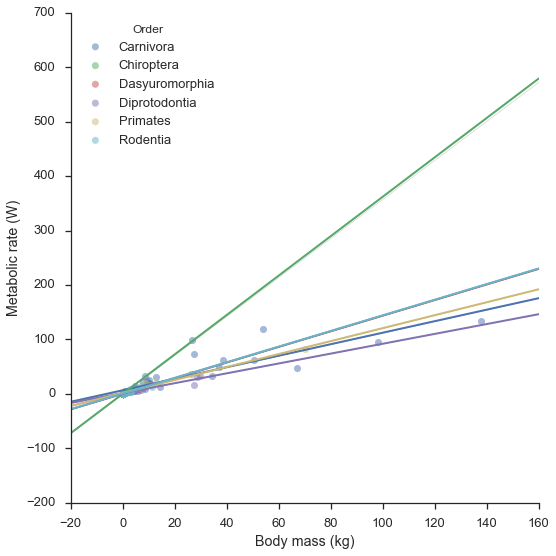

In [49]:
sns.lmplot(x='Body mass (kg)', y='Metabolic rate (W)', data=abund_mammalia, hue="Order", 
           ci=False, size=8, legend_out=False, line_kws={'lw':2}, scatter_kws={'s':50, 'alpha':0.5});

Because there is alot of data here I made the lines thinner - this can be done by giving _matplotlib_ keywords as a dictionary to the argument `line_kws` - and I made the markers bigger but with alpha (transperancy) 0.5 using the `scatter_kws` argument.

Still ,there's too much data, and part of the problem is that some Orders are large - primates - and some are small - rodents.
Let's plot a separate plot for each Order. We do this using the `col` and `row` arguments of `lmplot`, but in general this can be done for any plot using [_seaborn_'s `FacetGrid` function](http://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html).

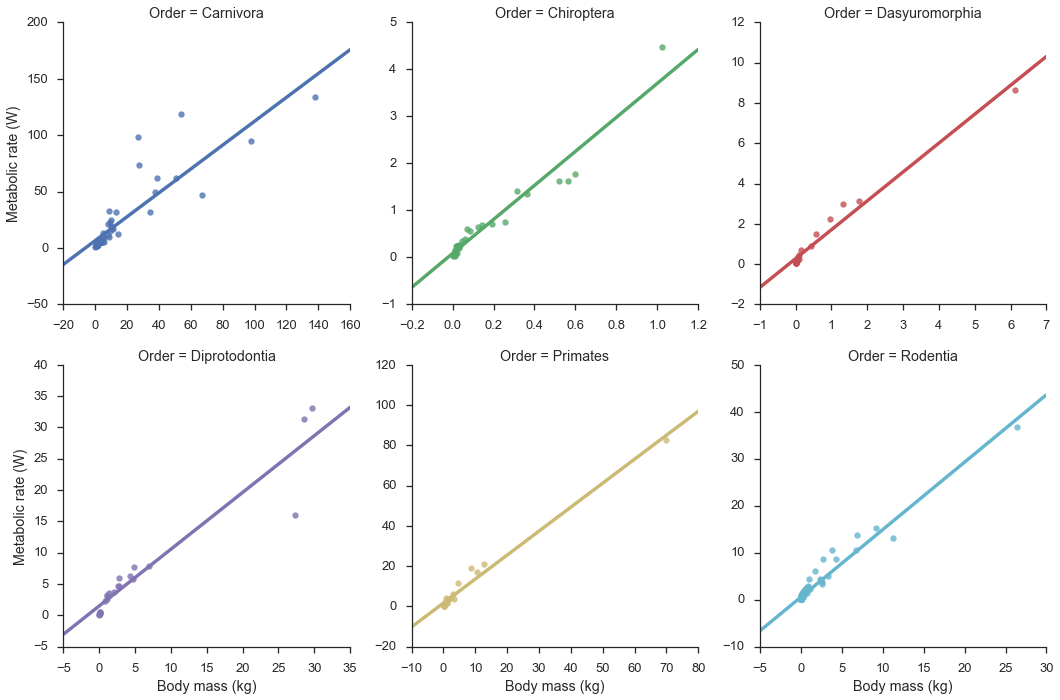

In [50]:
sns.lmplot(x='Body mass (kg)', y='Metabolic rate (W)', data=abund_mammalia, hue="Order", 
           col="Order", col_wrap=3, ci=None, scatter_kws={'s':40}, sharex=False, sharey=False);

We used the `sharex=False` and `sharey=False` arguments so that each Order will have a different axis range and so the data is will spread nicely.
Last but not least, let's have a closer look at the corelation between mass and metabolism in primates. 
We will do a joint plot which will give us the pearson correlation and the distribution of each parameter.

['Blue monkey', 'Brown lemur', 'Calabar angwantibo', "Demidoff's galago", 'Fat-tailed dwarf lemur', "Geoffroy's tamarin", 'Greater galago', 'Guereza', 'Hamadryas baboon', 'Human', 'Mantled howler monkey', 'Northern night monkey', 'Patas monkey', 'Philippine tarsier', 'Potto', 'Pygmy marmoset', 'Senegal galago', 'Slender loris', 'Slow loris', 'Small-eared galago', 'South African galago', 'South American squirrel monkey', 'Spectral tarsier', "Verreaux's sifaka", 'Western needle-clawed galago', 'White-tufted-ear marmoset']


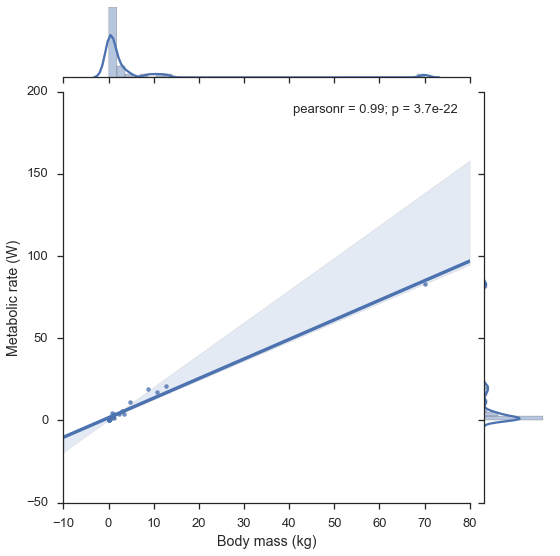

In [51]:
primates = mammalia[mammalia.Order == 'Primates']
print(sorted(primates["Common name"]))
sns.jointplot(x='Body mass (kg)', y='Metabolic rate (W)', data=primates, kind='reg', size=8);

## More

- Slides: [Statistical inference with Python](https://docs.google.com/presentation/d/1imQAEmNg4GB3bCAblauMOOLlAC95-XvkTSKB1_dB3Tg/pub?slide=id.p) by Allen Downey
- Book: [Think Stats](greenteapress.com/thinkstats2/html/index.html) by Allen Downey - statistics with Python. Free Ebook.
- Blog post: [A modern guide to getting started with Data Science and Python](http://twiecki.github.io/blog/2014/11/18/python-for-data-science/)
- Slides: [Losing your loops](https://speakerdeck.com/jakevdp/losing-your-loops-fast-numerical-computing-with-numpy-pycon-2015): Fast numerical computing with NumPy
- Notebooks: [Long Matplotlib tutorial](http://nbviewer.ipython.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb), [IPython-Matplotlib gallery](https://github.com/rasbt/matplotlib-gallery)

## Fin
This notebook is part of the _Python Programming for Life Sciences Graduate Students_ course given in Tel-Aviv University, Spring 2015.

The notebook was written using [Python](http://pytho.org/) 3.5.1 and [IPython](http://ipython.org/) 2.5.0 (download from [PyZo](http://www.pyzo.org/downloads.html)).

The code is available at https://github.com//Py4Life/TAU2016/blob/master/lecture8_dataAnalysis.ipynb.

The notebook can be viewed online at http://nbviewer.ipython.org/github//Py4Life/TAU2016/blob/master/lecture8_dataAnalysis.ipynb.

The notebook is also available as a PDF at https://github.com/Py4Life/TAU2015/blob/master/lecture8_dataAnalysis.pdf?raw=true.

This work is licensed under a Creative Commons Attribution-ShareAlike 3.0 Unported License.

![Python logo](https://www.python.org/static/community_logos/python-logo.png)